In [1]:
import pandas as pd
import requests
import urllib.parse as urlparse
import datetime

In [2]:
start = "37.77493,-122.419415"               # San Francisco
end = "34.052234,-118.243685"                # Los Angeles
traffic = "true"                             # To include traffic information
key = "<TYPE_YOUR_API_KEY_HERE>"             # API Key

key = "JuqRyvBBVoFbV0h2HOKQtijZcfnFFHF8"

# Base URL
base_url = "https://api.tomtom.com/routing/1/calculateRoute/"

In [3]:
today = datetime.date.today()
departure_time_start = datetime.datetime(today.year, today.month, today.day-1, 0, 0, 0)

hour_range = range(0,24)

for i in hour_range:
    # Update an hour
    departure_time = departure_time_start.replace(hour=departure_time_start.hour + i)
    
    # Format datetime string
    departure_time = departure_time.strftime('%Y-%m-%dT%H:%M:%S')    

    # Create request URL
    request_params = (
        urlparse.quote(start) + ":" + urlparse.quote(end) 
        + "/json?traffic=" + traffic
        + "&departAt=" + urlparse.quote(departure_time))

    request_url = base_url + request_params + "&key=" + key

    # Get data
    response = requests.get(request_url)

    # Convert to JSON
    json_result = response.json()
    
    # Get summary
    route_summary = json_result['routes'][0]['summary']
    
    # Convert to data frame and append
    if(i == 0):
        df = pd.json_normalize(route_summary)
    else:
        df = df.append(pd.json_normalize(route_summary), ignore_index=True)    
        
    print(f"Retrieving data: {i+1} / {len(hour_range)}")
    

https://api.tomtom.com/routing/1/calculateRoute/37.77493%2C-122.419415:34.052234%2C-118.243685/json?traffic=true&departAt=2021-11-10T00%3A00%3A00&key=JuqRyvBBVoFbV0h2HOKQtijZcfnFFHF8
Retrieving data: 1 / 24
https://api.tomtom.com/routing/1/calculateRoute/37.77493%2C-122.419415:34.052234%2C-118.243685/json?traffic=true&departAt=2021-11-10T01%3A00%3A00&key=JuqRyvBBVoFbV0h2HOKQtijZcfnFFHF8
Retrieving data: 2 / 24
https://api.tomtom.com/routing/1/calculateRoute/37.77493%2C-122.419415:34.052234%2C-118.243685/json?traffic=true&departAt=2021-11-10T02%3A00%3A00&key=JuqRyvBBVoFbV0h2HOKQtijZcfnFFHF8
Retrieving data: 3 / 24
https://api.tomtom.com/routing/1/calculateRoute/37.77493%2C-122.419415:34.052234%2C-118.243685/json?traffic=true&departAt=2021-11-10T03%3A00%3A00&key=JuqRyvBBVoFbV0h2HOKQtijZcfnFFHF8


KeyboardInterrupt: 

In [16]:
df

,lengthInMeters,travelTimeInSeconds,trafficDelayInSeconds,trafficLengthInMeters,departureTime,arrivalTime
0,659959,21048,0,0,2021-11-08T00:00:00-08:00,2021-11-08T05:50:48-08:00
1,659959,21204,0,0,2021-11-08T01:00:00-08:00,2021-11-08T06:53:23-08:00
2,657218,21529,0,0,2021-11-08T02:00:00-08:00,2021-11-08T07:58:49-08:00
3,659047,21548,0,0,2021-11-08T03:00:00-08:00,2021-11-08T08:59:07-08:00
4,659959,21440,0,0,2021-11-08T04:00:00-08:00,2021-11-08T09:57:19-08:00
5,659700,21491,0,0,2021-11-08T05:00:00-08:00,2021-11-08T10:58:11-08:00
6,659700,21645,0,0,2021-11-08T06:00:00-08:00,2021-11-08T12:00:45-08:00
7,661039,21866,0,0,2021-11-08T07:00:00-08:00,2021-11-08T13:04:26-08:00
8,661039,21923,0,0,2021-11-08T08:00:00-08:00,2021-11-08T14:05:23-08:00
9,661039,22057,0,0,2021-11-08T09:00:00-08:00,2021-11-08T15:07:36-08:00


In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Travel time against departure hour')

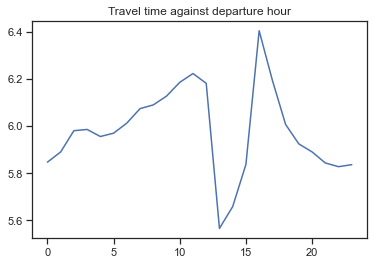

In [46]:
plt.plot(df['travelTimeInSeconds']/3600)
plt.title('Travel time against departure hour')

Text(0.5, 1.0, 'Travel distance against departure hour')

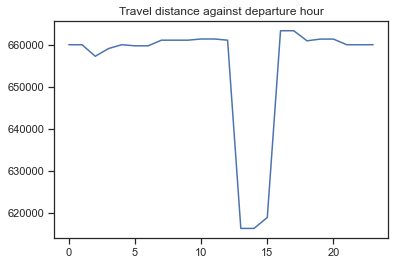

In [44]:
plt.plot(df['lengthInMeters'])
plt.title('Travel distance against departure hour')

Text(0.5, 1.0, 'Travel time against travel distance')

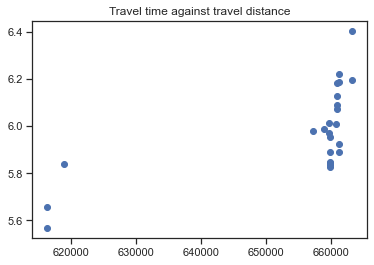

In [45]:
plt.scatter(df['lengthInMeters'], df['travelTimeInSeconds']/3600)
plt.title('Travel time against travel distance')

In [35]:
import seaborn as sns
sns.set_theme(style="ticks")

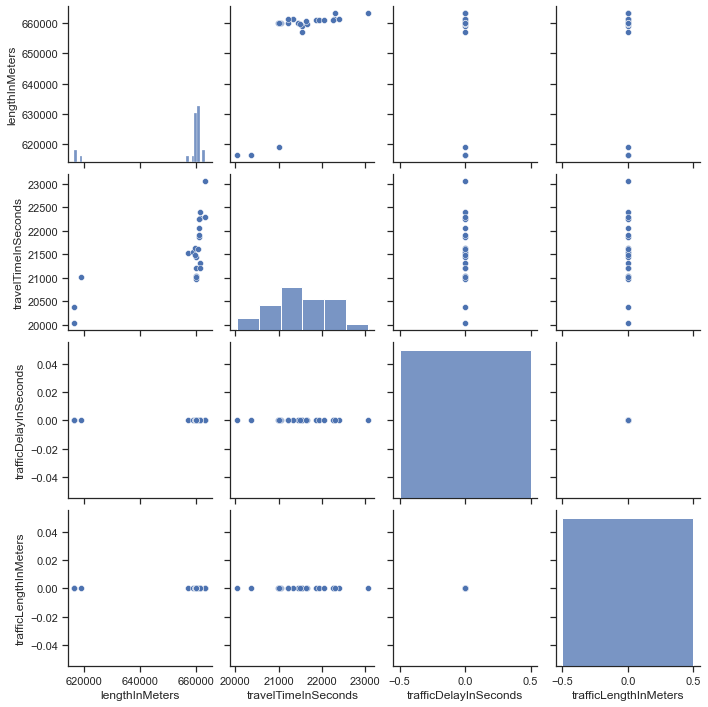

In [36]:
sns.pairplot(df)